<a href="https://colab.research.google.com/github/ValdazoAmerico/modelo-knn/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [2]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
X = tips_df.drop(['tip'], axis=1)
y = tips_df['tip']

X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [4]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [5]:
#Eliminamos las variables categoricas
numerical = X.drop(['sex', 'smoker', 'day', 'time'], axis=1)

In [6]:
numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [7]:
categorical = X.filter(['sex','smoker','day','time'])

In [8]:
categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [9]:
#convertimos las columnas categoricas en nùmericas mediante la codificacion one-hot.
cat_numerical = pd.get_dummies(categorical, drop_first=True)
cat_numerical.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1


In [10]:
#Concatenamos ambos dataframes
X = pd.concat([numerical, cat_numerical], axis=1)
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [12]:
#Normalizamos los datos con StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [13]:
#Implementación del algoritmo KNN con SKLearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
KNN_reg = KNeighborsRegressor(n_neighbors=5)
regressor = KNN_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [14]:
#Mètricas
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7513877551020406
Mean Squared Error: 0.9462902040816326
Root Mean Squared Error: 0.9727744877830794


In [16]:
#Calculo de K-vecinos contra RMSE

from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = []
for K in range(20):
  K = K+1
  model = neighbors.KNeighborsRegressor(n_neighbors = K)

  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  error = sqrt(mean_squared_error(y_test,pred))
  rmse_val.append(error)
  print('RMSE value for k= ', K, 'is:',error)

RMSE value for k=  1 is: 1.224070659558441
RMSE value for k=  2 is: 1.003956204833901
RMSE value for k=  3 is: 1.0275109171231496
RMSE value for k=  4 is: 1.0511392022225121
RMSE value for k=  5 is: 0.9727744877830794
RMSE value for k=  6 is: 1.0074143504384814
RMSE value for k=  7 is: 0.988492598687167
RMSE value for k=  8 is: 0.9872636471219688
RMSE value for k=  9 is: 1.0012995712790895
RMSE value for k=  10 is: 1.0511028027937213
RMSE value for k=  11 is: 1.0731050873927934
RMSE value for k=  12 is: 1.0914263120146148
RMSE value for k=  13 is: 1.106424024270493
RMSE value for k=  14 is: 1.0970901366858277
RMSE value for k=  15 is: 1.1148624758848305
RMSE value for k=  16 is: 1.1339921066283523
RMSE value for k=  17 is: 1.144846337938105
RMSE value for k=  18 is: 1.138505051185415
RMSE value for k=  19 is: 1.1544370133027204
RMSE value for k=  20 is: 1.1637807428149596


Text(0, 0.5, 'Error Rate')

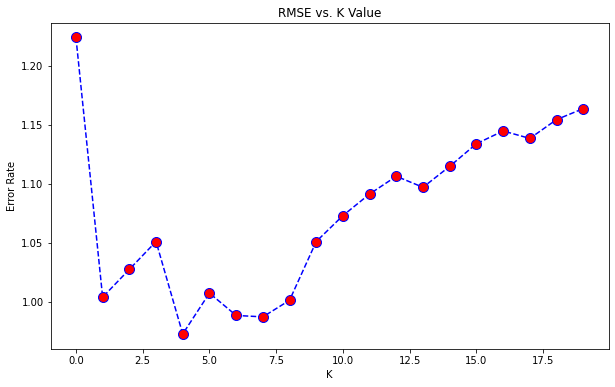

In [17]:
plt.figure(figsize=(10,6))
plt.plot(rmse_val, color="blue", linestyle="dashed",marker="o",markerfacecolor="red", markersize=10)
plt.title("RMSE vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#Implementación de GridsearchCV

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
params = {'estimator__algorithm:':[2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_train, y_train)
model.best_params_